1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from scipy import optimize,stats

Text(0, 0.5, 'y')

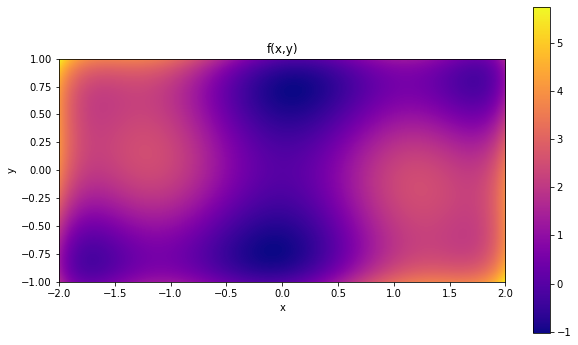

In [2]:
#Exercise 1

def f(Z):
    x,y = Z 
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2


x = np.arange(-2.0,2.0,0.01)
y = np.arange(-1.0,1.0,0.01)
Z = np.meshgrid(x, y)

fig, _ = plt.subplots(figsize=(10, 6))
pylab.imshow(f(Z),extent=[-2.0,2.0,-1.0,1.0], cmap=plt.cm.plasma) 
plt.colorbar()
plt.title("f(x,y)")
plt.xlabel("x")
plt.ylabel("y")


**Comments**

Visually there are two minima in (0;-0.75) and (0;0.75). 

The function is about f=-1 in the minima.

A numerical result can be found with optimize:

In [3]:
print("Global minima: \n")
min_1 = optimize.minimize(f,(0,-0.75),bounds=[(-0.5,0.5),(-1,-0.5)])
print("Min_1 = ",min_1,'\n')

min_2 = optimize.minimize(f,(0,0.75),bounds=[(-0.5,0.5),(0.5,1)])
print("Min_2 = ",min_2,'\n')

print("So the global minima are: \n", min_1.x, "\n", min_2.x, "\n")

print("----------------------------------------------------------------------------------------------------")
print("Behaviour around (0,0): \n")
solution_guess = optimize.minimize(f,(0,0))
print(solution_guess)

print("\n For an initial guess (x,y)=(0,0) we fall in a local minimum.")
print("optimize.basinhopping can be used to find a global minimum starting from (0,0): \n")
min_00 = optimize.basinhopping(f, [3,0])
print("Global minimum = ", min_00)
print("\n Basinhopping successfully finds one of the two global minima")


Global minima: 

Min_1 =        fun: -1.0316284534898772
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00000000e+00, 2.22044604e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.08984201, -0.71265641]) 

Min_2 =        fun: -1.031628453489877
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.22044605e-08,  0.00000000e+00])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.08984202,  0.7126564 ]) 

So the global minima are: 
 [ 0.08984201 -0.71265641] 
 [-0.08984202  0.7126564 ] 

----------------------------------------------------------------------------------------------------
Behaviour around (0,0): 

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

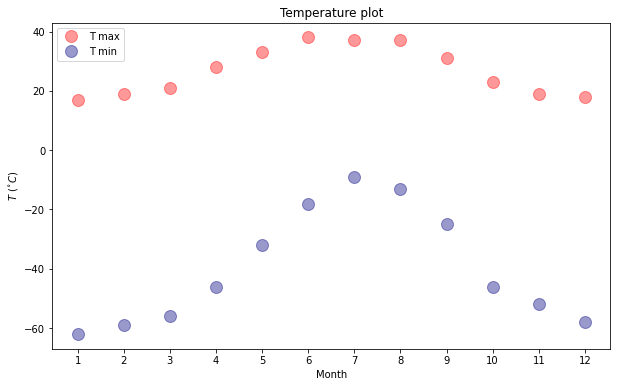

In [4]:
#Exercise 2

#Plot these temperatures

tmax=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
tmin=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

gridsize = (3, 2)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

ax1.plot(tmax, c="red", marker = "o", markersize = 12, linestyle = "None", label="T max", alpha=0.4)
ax1.plot(tmin, c="navy", marker="o", markersize = 12, linestyle = "None", label= "T min", alpha=0.4)
ax1.set_title("Temperature plot")
ax1.set_xlabel("Month")
ax1.set_ylabel("$T\ (^{\circ}C)$")
plt.xticks(np.arange(0,12), np.arange(1,13))
plt.legend(loc="upper left");

plt.show()

Fit function: gaussian + offset (vertical translation)

Fit Tmin: 

A = 52.65 +- 1.40
Mean (mu) = 6.16 +- 0.05
Sigma = 1.98 +- 0.08
Offset (c) = -61.32 +- 1.19


 Covariance Matrix: 
 [[ 1.96936653e+00 -8.73506462e-04  2.27190714e-02 -1.05131044e+00]
 [-8.73506462e-04  2.22850199e-03 -4.92555885e-05  1.09102080e-03]
 [ 2.27190714e-02 -4.92555885e-05  5.77330185e-03 -7.06524717e-02]
 [-1.05131044e+00  1.09102080e-03 -7.06524717e-02  1.41331614e+00]] 

Fit Tmax: 

A = 23.09 +- 1.15
Mean (mu) = 5.74 +- 0.08
Sigma = 2.29 +- 0.17
Offset (c) = 15.78 +- 1.18


 Covariance Matrix: 
 [[ 1.32862737e+00 -1.60405588e-03  1.01472871e-01 -1.08334796e+00]
 [-1.60405588e-03  6.31512188e-03 -2.12210655e-04  1.91627425e-03]
 [ 1.01472871e-01 -2.12210655e-04  2.75430391e-02 -1.70926615e-01]
 [-1.08334796e+00  1.91627425e-03 -1.70926615e-01  1.38426508e+00]] 



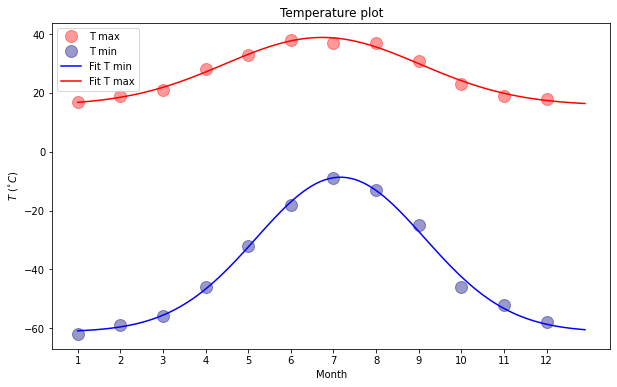

In [5]:
#Find a suitable a function that can describe min and max temperatures.
#Fit this function to the data with scipy.optimize.curve_fit()

print("Fit function: gaussian + offset (vertical translation)")
print("================================================================================= \n")


def fit_funct(x, A, mu, sigma, c):
    return A*np.exp(-(x - mu)**2 / (2 * sigma**2))+c

months= np.arange(0,12)


print("Fit Tmin: \n")
par, par_cov = optimize.curve_fit(fit_funct, months, tmin, p0=[60,7,2,-60], full_output=False)
par_min = par
par_cov_min = par_cov

print("A = %.2f +- %.2f" % (par[0], np.sqrt(par_cov[0,0])))
print("Mean (mu) = %.2f +- %.2f" % (par[1], np.sqrt(par_cov[1,1])))
print("Sigma = %.2f +- %.2f" % (par[2], np.sqrt(par_cov[2,2])))
print("Offset (c) = %.2f +- %.2f" % (par[3], np.sqrt(par_cov[3,3])))

print("\n\n Covariance Matrix: \n", par_cov, "\n")
print("=================================================================================")

print("Fit Tmax: \n")
par, par_cov = optimize.curve_fit(fit_funct, months, tmax, p0=[20,7,2,20], full_output=False)
par_max = par
par_cov_max = par_cov

print("A = %.2f +- %.2f" % (par[0], np.sqrt(par_cov[0,0])))
print("Mean (mu) = %.2f +- %.2f" % (par[1], np.sqrt(par_cov[1,1])))
print("Sigma = %.2f +- %.2f" % (par[2], np.sqrt(par_cov[2,2])))
print("Offset (c) = %.2f +- %.2f" % (par[3], np.sqrt(par_cov[3,3])))

print("\n\n Covariance Matrix: \n", par_cov, "\n")

plt.figure(figsize=(10, 6))


plt.plot(tmax, c="red", marker = "o", markersize = 12, linestyle = "None", label="T max", alpha=0.4)
plt.plot(tmin, c="navy", marker="o", markersize = 12, linestyle = "None", label= "T min", alpha=0.4)
plt.plot(np.arange(0,12,step=0.1), fit_funct(np.arange(0,12,step=0.1), par_min[0],par_min[1],par_min[2],par_min[3]), label="Fit T min",c="blue")
plt.plot(np.arange(0,12,step=0.1), fit_funct(np.arange(0,12,step=0.1), par_max[0],par_max[1],par_max[2],par_max[3]), label="Fit T max",c="red")

plt.title("Temperature plot")
plt.xlabel("Month")
plt.ylabel("$T\ (^{\circ}C)$")
plt.xticks(np.arange(0,12), np.arange(1,13))
plt.legend(loc="upper left");

plt.show()





In [6]:
# Is the fit reasonable? If not, why?

**Comments:**

In this exercise the experimental values ($y_i$) are not counts, so their error cannot be calculated assuming a Poisson distribution (a priori $\sigma_{yi} \neq \sqrt{y_i}$)

In the evaluation of ChiSquared as
$$\chi^2 = \sum_i \frac{(y_i - \hat{y}_i)^2}{\sigma_i^2}$$
we cannot therefore make the simplification $\sigma_i \approx \sigma_{yi} \approx \sqrt{yi}$. We should instead assume the experimental values as errorless, since no error is given, and evaluate $\sigma_i \approx \sigma_{\hat{yi}}$, obtained propagating the errors of the fit parameters of the gaussian.

Since in this case the calculation of the ChiSquared is quite demanding, I choose to use just the correlation coefficient to evaluate the goodnes of the fit:

$$R^2 = 1 - \frac{\textrm{SSR}}{\textrm{TSS}} = 1 - \frac{\sum_i \left(y_i - \hat{y_i}\right)^2}{\sum_i \left( y_i- \bar{y}\right)^2}$$

In which $y_i$ are the experimental values, $\hat{y_i}$ the theoretical ones $\hat{y_i} = f(x_i)$ and $\bar{y}$ the average experimental value.

In [7]:
print("Correlation coefficients: \n")

ssr = np.sum((tmin - fit_funct(months,par_min[0],par_min[1],par_min[2],par_min[3]))**2)
tss = np.sum((tmin -np.mean(tmin))**2)
r2 = 1 - ssr / tss
print("For minima R^2 =",r2)

ssr = np.sum((tmax - fit_funct(months,par_max[0],par_max[1],par_max[2],par_max[3]))**2)
tss = np.sum((tmax - np.mean(tmax))**2)
r2 = 1 - ssr / tss
print("For maxima R^2 =",r2)

Correlation coefficients: 

For minima R^2 = 0.994604193639716
For maxima R^2 = 0.9858796078363197


**Comments**

Both the fit are very good, since the correlation coefficients are close to 1

In [8]:
# Is the time offset for min and max temperatures the same within the fit accuracy?

delta_mu = par_min[1] - par_max[1]
print("Deviation mu_min - mu_max: %.2f" % delta_mu)
print("So the maximum of Tmin is nearly half a month later than the maximum of Tmax. \n")

comp = np.abs(par_min[1] - par_max[1])/np.sqrt(par_cov_min[1,1] + par_cov_max[1,1])
print("Compatibility betwean the means of the two distributions: %.2f" %comp)
print("So the two peaks are not coincident, within the fit accuracy (comp>3 means the two values are not compatible)")


Deviation mu_min - mu_max: 0.43
So the maximum of Tmin is nearly half a month later than the maximum of Tmax. 

Compatibility betwean the means of the two distributions: 4.64
So the two peaks are not coincident, within the fit accuracy (comp>3 means the two values are not compatible)


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Fit results:

 Gaussian:
A = 1437.93 +- 60.33
Mean (mu) = -0.09 +- 0.01
Sigma = 0.25 +- 0.01

 Parabolic background (ax^2+bx+c):
a = -2.03 +- 0.55
b = -3.84 +- 0.77
c = 26.04 +- 3.35

 Chi squared: 489.97 
 Pvalue: 0.00000


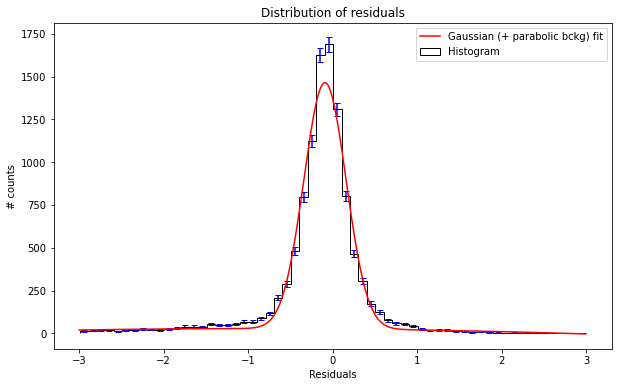

In [9]:
#Exercise 3

#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
data = pd.read_pickle("data/residuals_261.pkl")
df = pd.DataFrame(data.item())
df = df[df["residuals"].abs() < 3.] #I exclude the tails of the distribution


#Create an histogram with the appropriate binning and display it.
residuals = df["residuals"]
fig, ax = plt.subplots(figsize=(10, 6))

h, bins, _ = ax.hist(residuals, bins=60, color="black", histtype="step", label="Histogram")
ax.set_title("Distribution of residuals")
ax.set_xlabel("Residuals")
ax.set_ylabel("# counts")

#Poisson uncertainty for each bin
bin_centers = .5*(bins[:-1] + bins[1:])
sigmay = np.sqrt(h)
ax.errorbar(bin_centers, h, yerr=sigmay, color= "blue",  linestyle = "None", capsize=3)


#Define an appropriate function and fit it to the histogram of the residuals

def gaus(x, A, mu, sigma):
    return A*np.exp(-(x - mu)**2 / (2 * sigma**2))
def parabola(x,a,b,c):
    return a*x**2+b*x+c
def fitfunct(x, A, mu, sigma, a,b,c):
    return gaus(x, A, mu, sigma) + parabola(x,a,b,c)
    

xpoints=np.arange(-3,3,0.01)
par, par_cov = optimize.curve_fit(fitfunct, bin_centers, h, sigma =sigmay)

print("Fit results:")
print("\n Gaussian:")
print("A = %.2f +- %.2f" % (par[0], np.sqrt(par_cov[0,0])))
print("Mean (mu) = %.2f +- %.2f" % (par[1], np.sqrt(par_cov[1,1])))
print("Sigma = %.2f +- %.2f" % (par[2], np.sqrt(par_cov[2,2])))
print("\n Parabolic background (ax^2+bx+c):")
print("a = %.2f +- %.2f" % (par[3], np.sqrt(par_cov[3,3])))
print("b = %.2f +- %.2f" % (par[4], np.sqrt(par_cov[4,4])))
print("c = %.2f +- %.2f" % (par[5], np.sqrt(par_cov[5,5])))


ax.plot(xpoints, fitfunct(xpoints, *par), color="red", label = "Gaussian (+ parabolic bckg) fit")
plt.legend(loc="upper right")



#Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?
from scipy import stats

ndof = len(bin_centers) - 1 # 
chi2 = np.sum(((h - fitfunct(bin_centers, *par))**2) / (sigmay**2))
pvalue = 1. - stats.chi2.cdf(chi2, ndof)

print("\n Chi squared: %.2f " % chi2)
print(" Pvalue: %.5f" % pvalue)




**Comments:**

A reasonable pvalue threshold to consider valid the results of a fit is p>0.05:
the probability that the residuals actually follows a gaussian (+bckg) distribution must be >5%.

The resulting pvalue is 0, so below the treshold, so the results of the fit must be rejected: the fit function doesn't properly fit the data.

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [10]:
#Exercise 4 

#Get the following data file
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

infile = "data/munich_temperatures_average_with_bad_data.txt"
data = pd.read_csv(infile, sep=" ", header=None, names=["Time", "Temp"])
data = data[(data["Time"] >= 2008) & (data["Time"] <= 2012)] #Select time range
data = data[np.abs(data["Temp"]) <50] #Remove noise

time = data["Time"]
temp = data["Temp"]

data

,Time,Temp
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444
...,...,...
6204,2011.98836,3.44444
6205,2011.99110,1.27778
6206,2011.99384,2.88889
6207,2011.99658,1.83333


Fit results:
a = -9.96 +- 0.13
b = 12.33 +- 0.01
c = 9.26 +- 0.09


Overall average temperature in Munich: 9.26 °C
Coldest time of the year: -0.70 °C
Hottest time of the year: 19.22 °C


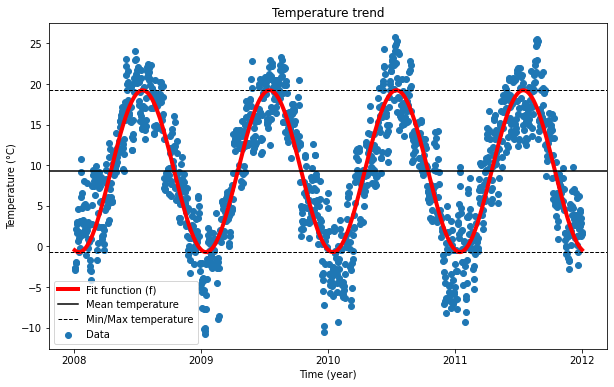

In [11]:
#Make a plot of the data and the best-fit model in the range 2008 to 2012

def f(t,a,b,c):
    return a*np.cos(2*np.pi*t+b)+c

par, par_cov = optimize.curve_fit(f,time,temp)

print("Fit results:")
print("a = %.2f +- %.2f" % (par[0], np.sqrt(par_cov[0,0])))
print("b = %.2f +- %.2f" % (par[1], np.sqrt(par_cov[1,1])))
print("c = %.2f +- %.2f" % (par[2], np.sqrt(par_cov[2,2])))

ssr_f = np.sum((temp-f(time, *par))**2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(time, temp, label = "Data")
ax.plot(time, f(time, *par), c="red", linewidth=4, label="Fit function (f)")
ax.set_title("Temperature trend")
ax.set_ylabel("Temperature (°C)")
ax.set_xlabel("Time (year)")
ax.set_xticks(np.arange(2008, 2013)) 

print("\n")
print("Overall average temperature in Munich: %.2f" %temp.mean(), "°C")
ax.axhline(y=temp.mean(), color="black", label="Mean temperature")

print("Coldest time of the year: %.2f" %f(time, *par).min(), "°C")
ax.axhline(y=f(time, *par).min(), color="black", linestyle = "--", linewidth=1)

print("Hottest time of the year: %.2f" %f(time, *par).max(), "°C")
ax.axhline(y=f(time, *par).max(), color="black", linestyle = "--", linewidth=1, label="Min/Max temperature")


ax.legend()



**Comments**

The parameter _b_ is a phase. 

sin(0)=0 -> The phase is introduced to allow an horizontal translation of the sine, in order to properly fit the data

Fit results:
a = -9.96 +- 0.13
b = 1.00 +- 0.00
c = 8.62 +- 23.79
d = 9.27 +- 0.10


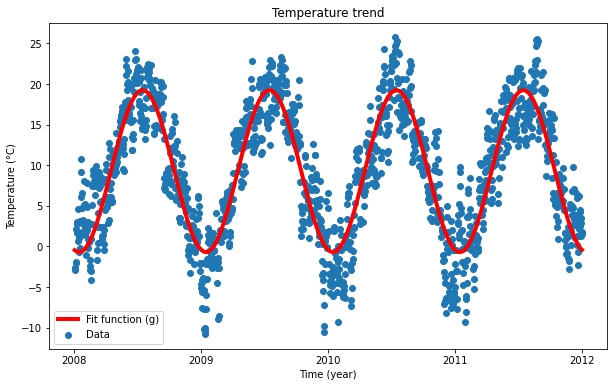

In [12]:
def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*b*t+c)+d

par, par_cov = optimize.curve_fit(g,time,temp)

print("Fit results:")
print("a = %.2f +- %.2f" % (par[0], np.sqrt(par_cov[0,0])))
print("b = %.2f +- %.2f" % (par[1], np.sqrt(par_cov[1,1])))
print("c = %.2f +- %.2f" % (par[2], np.sqrt(par_cov[2,2])))
print("d = %.2f +- %.2f" % (par[3], np.sqrt(par_cov[3,3])))

ssr_g = np.sum((temp-g(time, *par))**2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(time, temp, label = "Data")
ax.plot(time, g(time, *par), c="red", linewidth=4, label="Fit function (g)")
ax.set_title("Temperature trend")
ax.set_ylabel("Temperature (°C)")
ax.set_xlabel("Time (year)")
ax.set_xticks(np.arange(2008, 2013)) 
ax.legend()

In [16]:
from scipy.stats import f

#What are the RSS for 𝑓(𝑥) and 𝑔(𝑥)? (Calculated before)
print("f(x) -> rss_f = %.2f" % ssr_f)
print("g(x) -> rss_g = %.2f"% ssr_g)

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    return CL

#Use the Fisher F-test to determine whether the additional parameter is motivated
cl = Ftest(ssr_f, ssr_g, 2, 3, len(time))
print("CL= %.2f"%(cl*100), "%")

f(x) -> rss_f = 18669.52
g(x) -> rss_g = 18669.23
CL= 88.05 %


**Comments**

The Ftest tells us that the additional parameter is not useful (CL>10%).

This could be understood just looking at the _g_ fit result: b=1.0+-0.0
so $g \equiv f$ 